# Where did we find GitHub links in eprints papers?

In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
f = open("../data/eprints_repos.txt", "r")
repos = []
for line in f.readlines():
    repos.append(line.rstrip("\n"))
repos = sorted(repos)

In [3]:
def load_cleaned_links(repo, date, domain):
    path = f"../data/analysis/cleaned_links/cleaned_urls_{repo}_{date}_{domain}.csv"
    try:
        df = pd.read_csv(path)
    except FileNotFoundError:
        return None
    return df

In [4]:
df = None
for repo in repos:
    repo_df = load_cleaned_links(repo, "2010-", "github.com")
    if repo_df is not None:
        repo_df["repo"] = repo
        if df is None:
            df = repo_df
        else:
            df = pd.concat([df, repo_df])

In [5]:
df.describe()

,page_no
count,2391.00000
mean,31.28440
std,59.12617
min,0.00000
25%,5.00000
50%,10.00000
75%,21.00000
max,521.00000


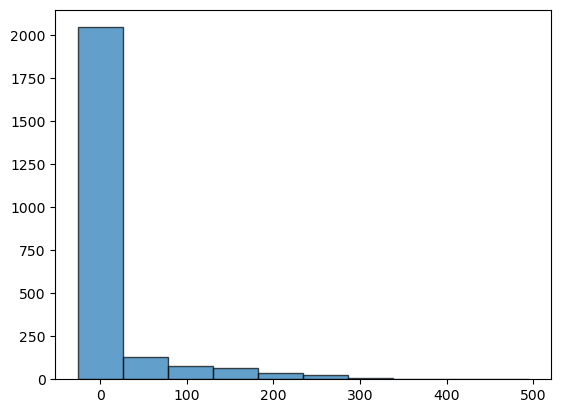

In [6]:
plt.hist(df.page_no, align="left", ec="black", alpha=0.7)
plt.show()

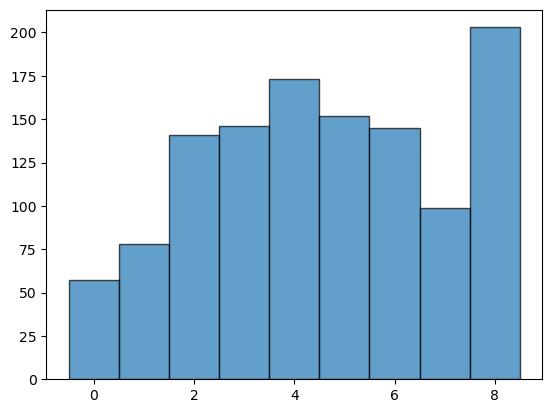

In [7]:
plt.hist(df.page_no[df.page_no < 10], bins=np.arange(10), align="left", ec="black", alpha=0.7)
plt.show()

CLOK can have title page in front, so first page ends up being the second one. IEEE papers can have that as well (Kingston), Openaccess. Can we check for that somehow? Others have introductions that last onto the second page and link GitHub there.

## Page 1

In [17]:
to_check = df.loc[df.page_no == 0, ["pdf_url", "github_user_cleaned_url"]]
pd.set_option('display.max_colwidth', None)
to_check

,pdf_url,github_user_cleaned_url
91,https://clok.uclan.ac.uk/15668/1/15668_ORCID_Eprints_Implementation_Survey_Analysis_final.pdf,eprintsug/loginViaOrcid
92,https://clok.uclan.ac.uk/15668/1/15668_ORCID_Eprints_Implementation_Survey_Analysis_final.pdf,eprintsug/orcidt2
13,https://eprints.keele.ac.uk/id/eprint/11435/7/aa44765-22.pdf,SamirNepal/Li_CNN_2022
76,https://eprints.keele.ac.uk/id/eprint/11091/1/bmj-2021-069249.full.pdf,survival-lumc/ValidationCompRisks
138,https://eprints.keele.ac.uk/id/eprint/8945/1/Howell%20etal_CandG_2021.pdf,lphowell/Geothermal-Modelling
187,https://eprints.keele.ac.uk/id/eprint/6711/1/models-2019.pdf,epsilonlabs/emf-cbp
194,https://eprints.keele.ac.uk/id/eprint/6317/1/van-loon-2019-mass-loss-expansion-velocities-dust-production-mnras-aam.pdf,s-goldman/Dusty-Evolved-Star-Kit
256,https://eprints.keele.ac.uk/id/eprint/1123/1/olier_2014_journal.pone.0099825.pdf,rOpenHealth/ClinicalCodes
46,https://eprints.kingston.ac.uk/id/eprint/39066/1/Ben-Tal-O-39066-VoR.pdf,IraKorshunova/folk-rnn
0,https://eprints.lincoln.ac.uk/id/eprint/53780/1/ICRA_2023_CameraReadyFinal.pdf,karthikiitm87/domain-generalisation


In [18]:
f = open("../data/analysis/true_positives.txt", "r")
true_pos = []
for line in f.readlines():
    true_pos.append(line.rstrip("\n"))

In [19]:
false_pos = [repo for repo in to_check["github_user_cleaned_url"] if not repo in true_pos]

In [20]:
false_pos

['eprintsug/loginViaOrcid',
 'eprintsug/orcidt2',
 'udacity/self-driving-car',
 'stain/profilechecker',
 'r-barnes/dggridR',
 'facebookresearch/SentEval',
 'sebastianarnold/WikiSection',
 'OctoMap/octomap',
 'introlab/rtabmap',
 'muellmusik/Utopia',
 'muellmusik/Utopia',
 'muellmusik/Utopia',
 'supercollider/supercollider',
 'supercollider-quarks/Republic']

In [21]:
print(f"Page 1: out of {len(to_check)}, {len(false_pos)} were false positives.")

Page 1: out of 57, 14 were false positives.


In [9]:
df[df.duplicated(["github_user_cleaned_url", "pdf_url"], keep=False)][["page_no", "github_user_cleaned_url", "author_for_reference", "title", "pdf_url"]]

,page_no,github_user_cleaned_url,author_for_reference,title,pdf_url
138,0,lphowell/Geothermal-Modelling,L Howell,Deep geothermal energy in northern England: Insights from 3D finite difference temperature modelling,https://eprints.keele.ac.uk/id/eprint/8945/1/Howell%20etal_CandG_2021.pdf
139,10,lphowell/Geothermal-Modelling,L Howell,Deep geothermal energy in northern England: Insights from 3D finite difference temperature modelling,https://eprints.keele.ac.uk/id/eprint/8945/1/Howell%20etal_CandG_2021.pdf
215,26,mohfadhil/suspectrate-datasets,Mohammed Fadhil Zamil Al-Janabi,Detection of suspicious URLs in online social networks using supervised machine learning algorithms,https://eprints.keele.ac.uk/id/eprint/5581/1/Al-JanabiPhD2018.pdf
216,28,mohfadhil/suspectrate-datasets,Mohammed Fadhil Zamil Al-Janabi,Detection of suspicious URLs in online social networks using supervised machine learning algorithms,https://eprints.keele.ac.uk/id/eprint/5581/1/Al-JanabiPhD2018.pdf
83,13,GoreLab/Sorghum-HapMap,Roberto Lozano,Comparative evolutionary genetics of deleterious load in sorghum and maize,https://eprints.lincoln.ac.uk/id/eprint/43715/7/DelLoad_Sorghum_Maize2_Lozano.pdf
87,18,GoreLab/Sorghum-HapMap,Roberto Lozano,Comparative evolutionary genetics of deleterious load in sorghum and maize,https://eprints.lincoln.ac.uk/id/eprint/43715/7/DelLoad_Sorghum_Maize2_Lozano.pdf
38,10,walfaelschung/GDELT_flow,M. Hoffmann,Lifting the veil on the use of big data news repositories: A documentation and critical discussion of a protest event analysis,https://openaccess.city.ac.uk/id/eprint/28866/1/Hoffmann_Lifting%20the%20Veil%20on%20the%20Use%20of%20Big%20Data%20News%20Repositories%20A%20Documentation%20and%20Critical%20Discussion%20of%20A%20Protest%20Event%20Analysis.pdf
39,17,walfaelschung/GDELT_flow,M. Hoffmann,Lifting the veil on the use of big data news repositories: A documentation and critical discussion of a protest event analysis,https://openaccess.city.ac.uk/id/eprint/28866/1/Hoffmann_Lifting%20the%20Veil%20on%20the%20Use%20of%20Big%20Data%20News%20Repositories%20A%20Documentation%20and%20Critical%20Discussion%20of%20A%20Protest%20Event%20Analysis.pdf
204,8,JoramSoch/ITEM-paper,J. Soch,Inverse Transformed Encoding Models – a solution to the problem of correlated trial-by-trial parameter estimates in fMRI decoding,https://openaccess.city.ac.uk/id/eprint/26393/1/1-s2.0-S1053811919310407-main.pdf
205,12,JoramSoch/ITEM-paper,J. Soch,Inverse Transformed Encoding Models – a solution to the problem of correlated trial-by-trial parameter estimates in fMRI decoding,https://openaccess.city.ac.uk/id/eprint/26393/1/1-s2.0-S1053811919310407-main.pdf


## Page 2

In [22]:
to_check = df.loc[df.page_no == 1, ["pdf_url", "github_user_cleaned_url"]]
pd.set_option('display.max_colwidth', None)

In [23]:
f = open("../data/analysis/true_positives.txt", "r")
true_pos = []
for line in f.readlines():
    true_pos.append(line.rstrip("\n"))
false_pos = [repo for repo in to_check["github_user_cleaned_url"] if not repo in true_pos]
print(f"Page 2: out of {len(to_check)}, {len(false_pos)} were false positives.")

Page 2: out of 78, 29 were false positives.
